In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GDPC1 = pd.read_csv("GDPC1.csv")
IMPGS = pd.read_csv("IMPGS.csv")
CPIAUCSL = pd.read_csv("CPIAUCSL.csv")

In [3]:
GDPC1

,DATE,GDPC1
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
...,...,...
299,2021-10-01,20006.181
300,2022-01-01,19924.088
301,2022-04-01,19895.271
302,2022-07-01,20054.663


In [4]:
IMPGS

,DATE,IMPGS
0,1947-01-01,7.519
1,1947-04-01,8.203
2,1947-07-01,7.663
3,1947-10-01,8.347
4,1948-01-01,9.624
...,...,...
299,2021-10-01,3647.745
300,2022-01-01,3927.908
301,2022-04-01,4074.409
302,2022-07-01,3955.795


In [5]:
CPIAUCSL

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990


The datasets that I've chosen all show a different statistic over a length of time. The statistics I've chosen are Consumer Price Index (CPI / CPIAUCSL), Imports of Goods and Services, and Real GDP. I've chosen these statistics because they all influence each other. As GDP rises, so does the consumer price index because people have more money to spend on goods, so the price of those goods increases. This raise in price causes consumers to look to import products that may be cheaper than the domestic alternative, raising total imports.

Text(0.5, 1.0, 'Real GDP')

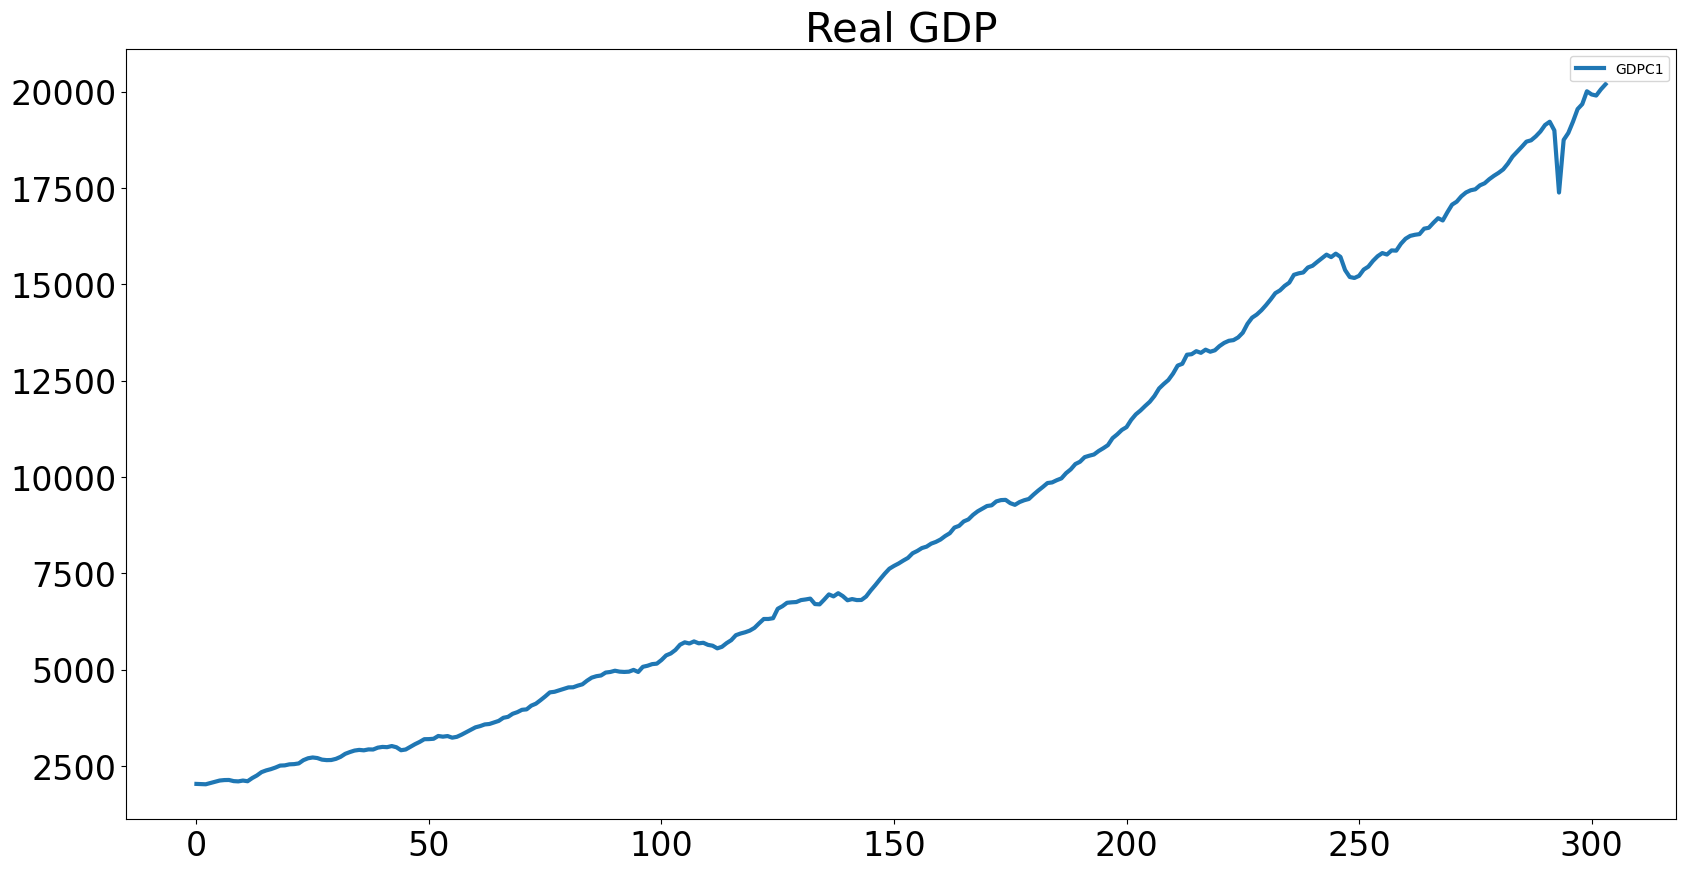

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
GDPC1.plot.line(ax = ax, fontsize = 24, linewidth = 3)
ax.set_title("Real GDP", fontsize = 30)


Text(0.5, 1.0, 'Imports of Goods and Services')

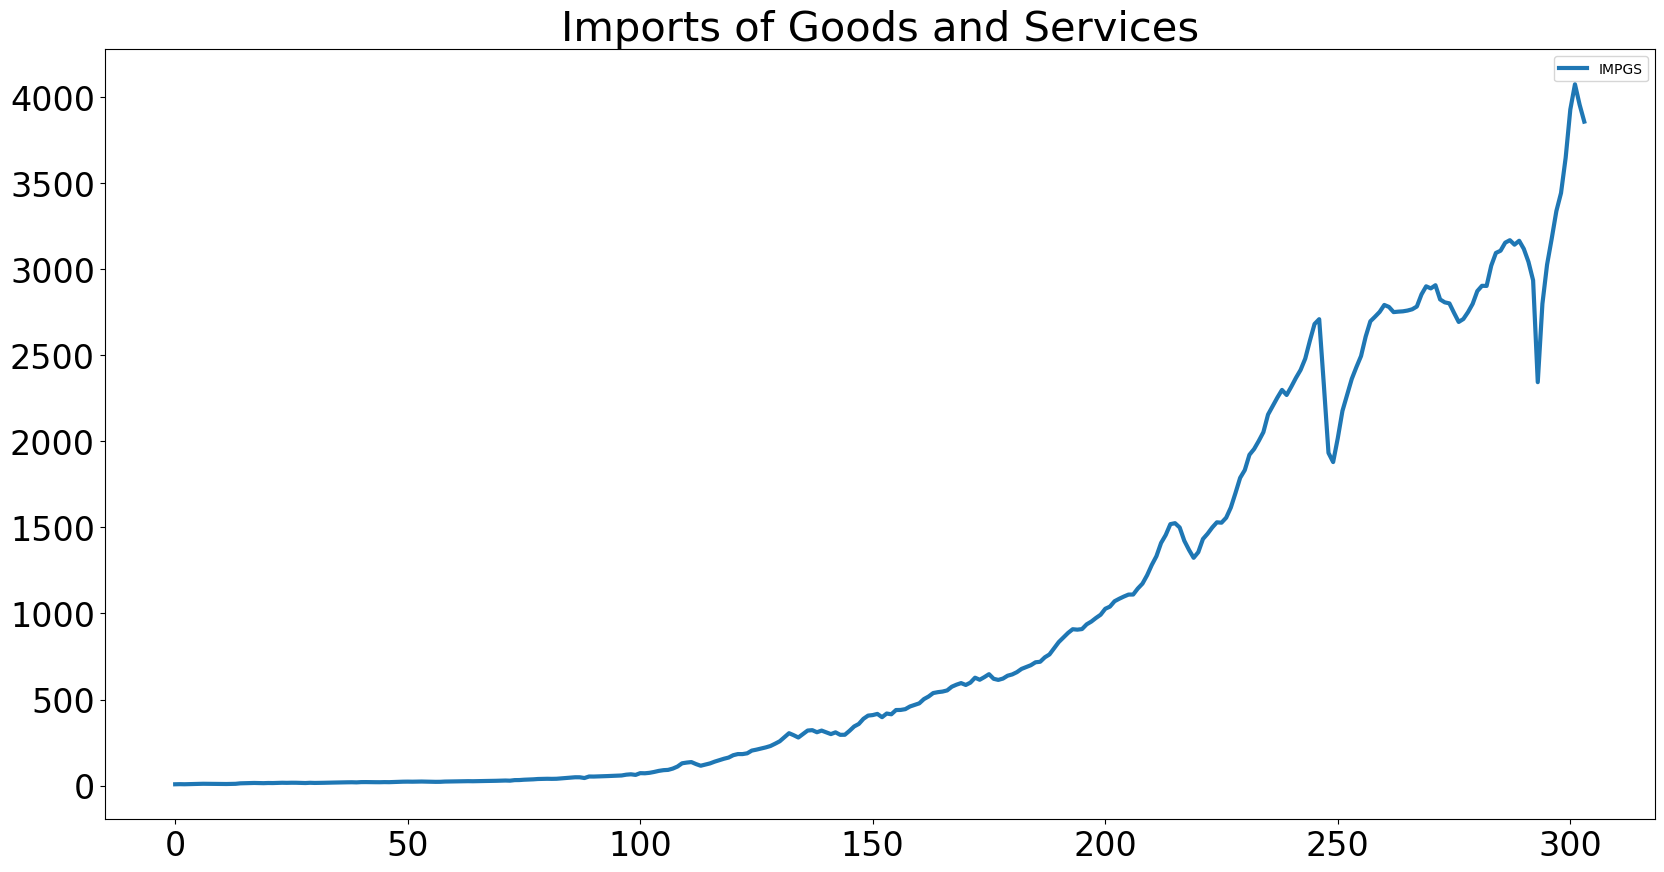

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
IMPGS.plot.line(ax = ax, fontsize = 24, linewidth = 3)
ax.set_title("Imports of Goods and Services", fontsize = 30)

Text(0.5, 1.0, 'Consumer Price Index')

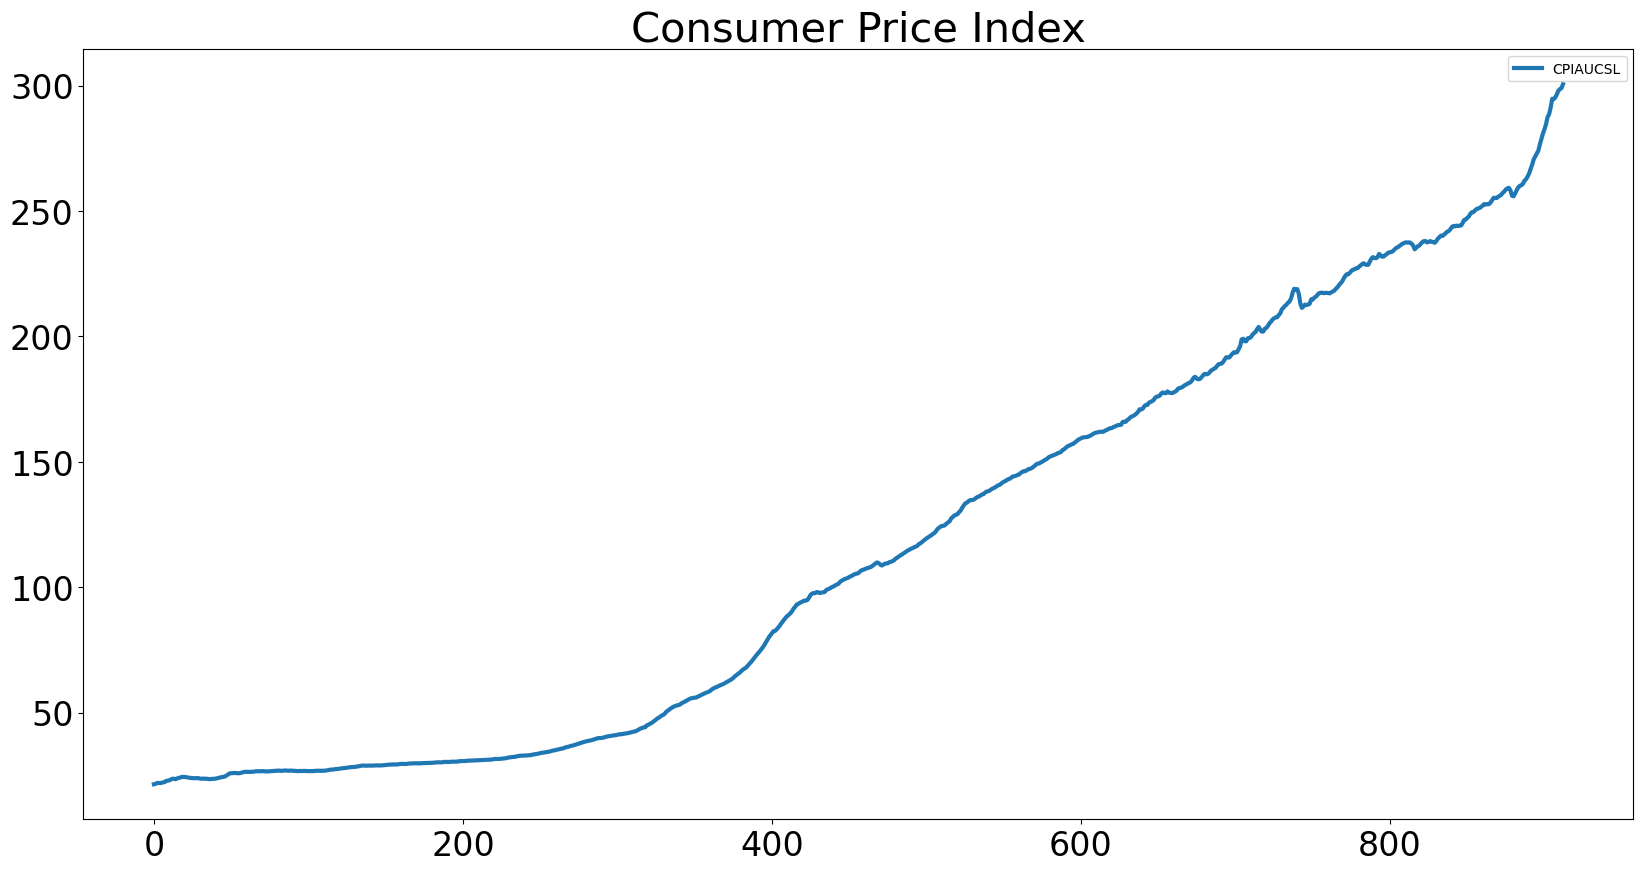

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
CPIAUCSL.plot.line(ax = ax, fontsize = 24, linewidth = 3)
ax.set_title("Consumer Price Index", fontsize = 30)

In [9]:
FEDFUNDS = pd.read_csv("FEDFUNDS.csv")
CURRCIR = pd.read_csv("CURRCIR.csv")
NGDPNSAXDCUSQ = pd.read_csv("NGDPNSAXDCUSQ.csv")


/Users/mattkrepp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

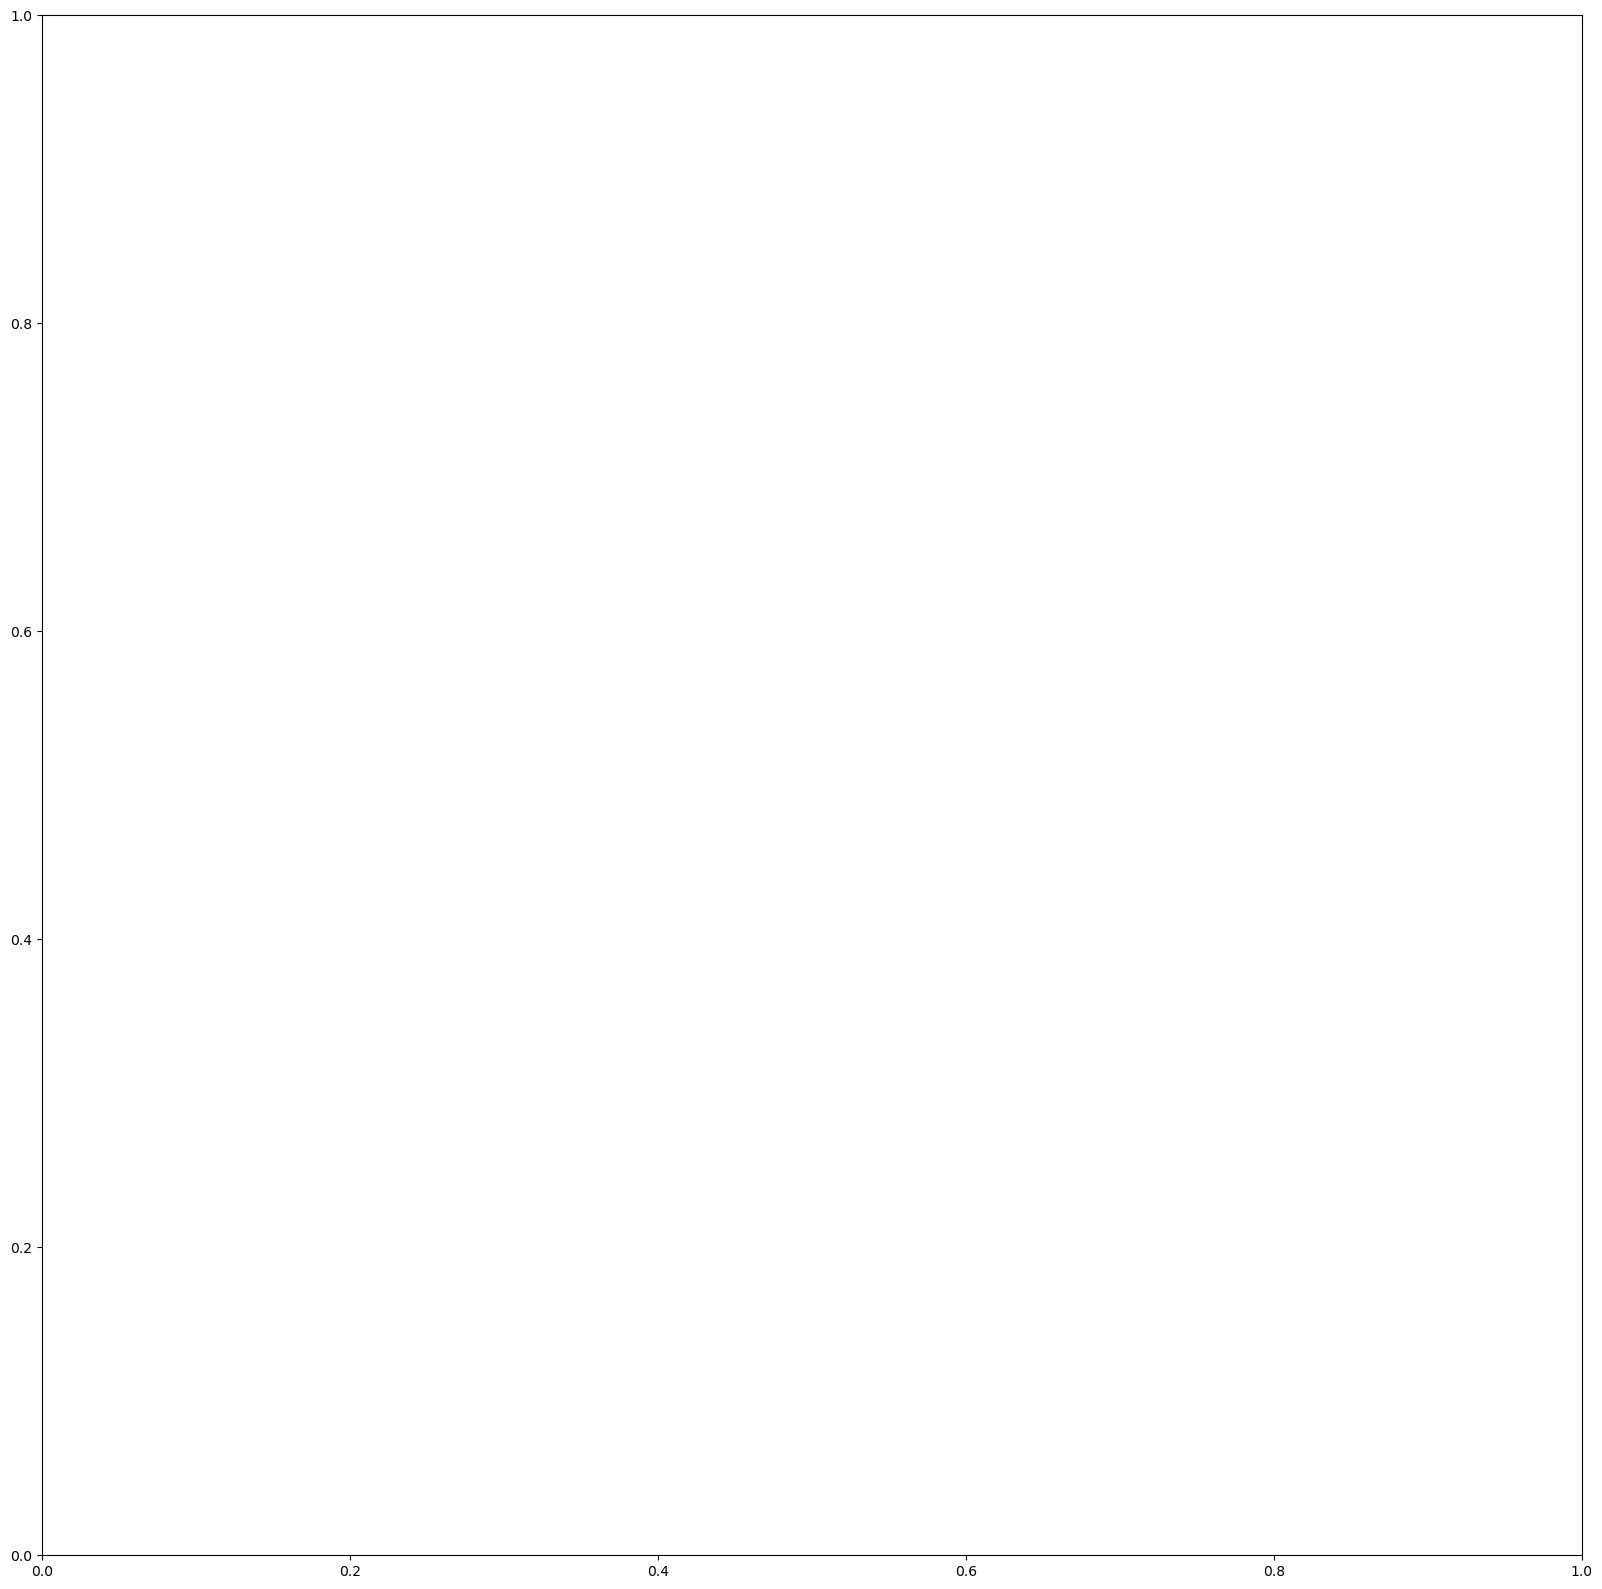

In [35]:
data = (FEDFUNDS, CURRCIR, NGDPNSAXDCUSQ, CPIAUCSL, GDPC1)
import numpy as np
def corr_matrix_heatmap(data = data):  
    fig, ax = plt.subplots(figsize=(20,20))   
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    x_ticks = np.arange(num_vars)  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)   
    y_ticks = np.arange(len(labels))   
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")   
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()


corr_matrix_heatmap(data)

,CPIAUCSL,CURRCIR,DATE,FEDFUNDS,GDPC1,NGDPNSAXDCUSQ
